In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronavirus-genome-sequence/MN908947.fna
/kaggle/input/coronavirus-genome-sequence/A_new_coronavirus_associated_with_human_respirator.pdf
/kaggle/input/coronavirus-genome-sequence/MN908947.txt
/kaggle/input/covid19-genbank-file/sequence.gb.txt


The COVID-19 genome is the complete genetic material of the SARS-CoV-2 virus, which is responsible for the COVID-19 pandemic. It is an RNA genome consisting of approximately 30,000 nucleotides. The genome contains important information encoded in its sequence, including instructions for viral replication, protein synthesis, and interaction with host cells. Understanding the COVID-19 genome is crucial for developing diagnostic tests, vaccines, and treatments. Scientists have extensively studied the genome to identify various genetic markers, mutations, and potential targets for interventions. Analyzing the genome helps in tracking the spread of the virus, studying its evolutionary changes, and designing effective strategies to control the disease.

In this notebook I will primarily be dealing with the transcription, translation and prediction of genome/dna sequences during the covid-19 pandemic. 

importing the genome sequence for protein transcription and translation into RNA and proteins respectively

In [2]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
covid19 = SeqIO.read('/kaggle/input/coronavirus-genome-sequence/MN908947.fna', "fasta")

finding the total count of the covid19 genome sequence

In [3]:
sequence_count = len(covid19)
print("Total count of the sequence: ", sequence_count)

Total count of the sequence:  29903


to perform some basic operations on the DNA segment of the covid 19 genome, let us extract the first 50 characters of the sequence

In [4]:
covid19_DNA=covid19.seq
covid_DNA=covid19_DNA[:50]
print(covid_DNA) #print the final DNA segment

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC


The DNA sequence here primarily consists of 4 bases: Alanines, Glycines, Cysteines and Threonines. Using this basic sequence, certain operations can be performed

in the below code block we will be implementing the complement and reverse complement of the given DNA sequence

In [5]:
print(covid_DNA + " - Sequence")
print(covid_DNA.complement() + " - Complement")
print(covid_DNA.reverse_complement() + " - Reverse Complement")

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC - Sequence
TAATTTCCAAATATGGAAGGGTCCATTGTTTGGTTGGTTGAAAGCTAGAG - Complement
GAGATCGAAAGTTGGTTGGTTTGTTACCTGGGAAGGTATAAACCTTTAAT - Reverse Complement


To understand the content of the COVID-19 better, lets count the percentage of A,G,C and T in the genome sequence

In [6]:
count_A = covid19_DNA.count('A')
count_G = covid19_DNA.count('G')
count_C = covid19_DNA.count('C')
count_T = covid19_DNA.count('T')

# Calculate the percentages
total_count = len(covid19_DNA)
percentage_A = (count_A / total_count) * 100
percentage_G = (count_G / total_count) * 100
percentage_C = (count_C / total_count) * 100
percentage_T = (count_T / total_count) * 100

# Print the percentages
print("Percentage of A: {:.2f}%".format(percentage_A))
print("Percentage of G: {:.2f}%".format(percentage_G))
print("Percentage of C: {:.2f}%".format(percentage_C))
print("Percentage of T: {:.2f}%".format(percentage_T))

Percentage of A: 29.94%
Percentage of G: 19.61%
Percentage of C: 18.37%
Percentage of T: 32.08%


plotting a bar plot for the total A,G,C,T count

In [7]:
nucleotides={'A':count_A,'G':count_G,'C':count_C,'T':count_T}
print(nucleotides)

{'A': 8954, 'G': 5863, 'C': 5492, 'T': 9594}


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


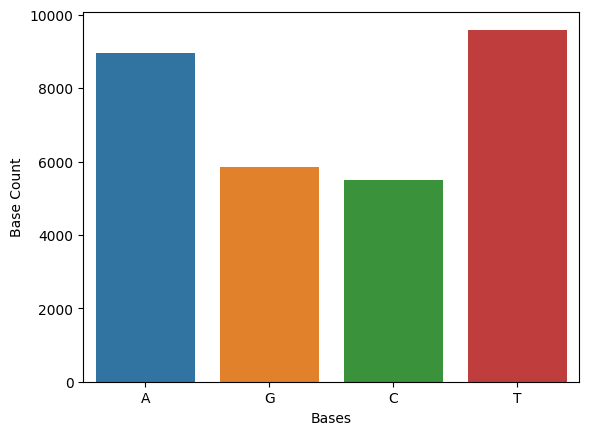

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the nucleotide counts
nucleotides = {'A': count_A, 'G': count_G, 'C': count_C, 'T': count_T}

# Create lists for x-axis labels and y-axis values
bases = list(nucleotides.keys())
base_counts = list(nucleotides.values())

# Create bar plot using Seaborn
sns.barplot(x=bases, y=base_counts)

# Set labels for x-axis and y-axis
plt.xlabel('Bases')
plt.ylabel('Base Count')

# Display the plot
plt.show()

Hence we have been able to find the counts of all the bases in the given genome sequence

The GC content of a genome sequence refers to the percentage of nucleotides that are either guanine (G) or cytosine (C) in relation to the total number of nucleotides in the sequence. It is a measure of the relative abundance of these nucleotides in the DNA molecule.

GC content is important because it can influence the stability and properties of the DNA molecule. The stability of DNA can have implications for various biological processes such as DNA replication, transcription, and protein binding. Additionally, differences in GC content can be associated with variations in gene expression, evolutionary patterns, and genome structure among different organisms.Now, finding the GC% using predefined modules in BioPython, we get:

In [9]:
from Bio.SeqUtils import GC
print("GC% is equal to: " +str(GC(covid19_DNA)))

GC% is equal to: 37.97277865097148


/opt/conda/lib/python3.10/site-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


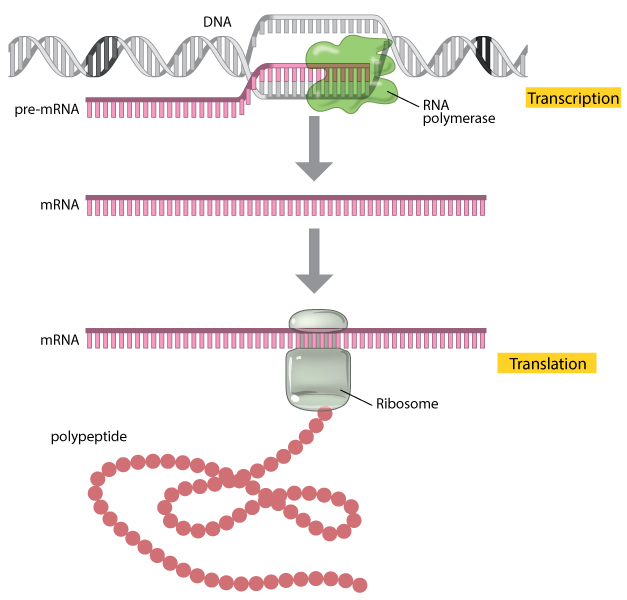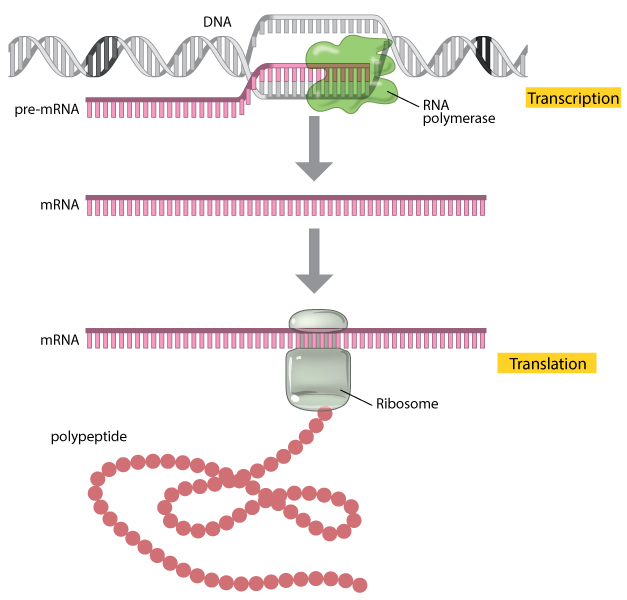

***TRANSCIPTION AND TRANSLATION***

During gene expression, the genetic information stored in a sequence of DNA is used to produce functional gene products, typically proteins. This process involves two main steps: transcription and translation.

Transcription is the process by which DNA is copied or transcribed into a messenger RNA (mRNA) molecule. The DNA sequence serves as a template for the synthesis of an mRNA molecule through a complementary base-pairing mechanism. The resulting mRNA molecule contains a copy of the genetic information from the DNA, but with the nucleotide thymine (T) replaced by uracil (U).

Translation is the subsequent step where the mRNA molecule is translated into a sequence of amino acids, which form a protein. The mRNA molecule contains codons, which are sequences of three nucleotides that specify particular amino acids. During translation, the ribosome reads the mRNA sequence and matches each codon with its corresponding amino acid, based on the genetic code. This process continues until a stop codon is encountered, indicating the end of protein synthesis.

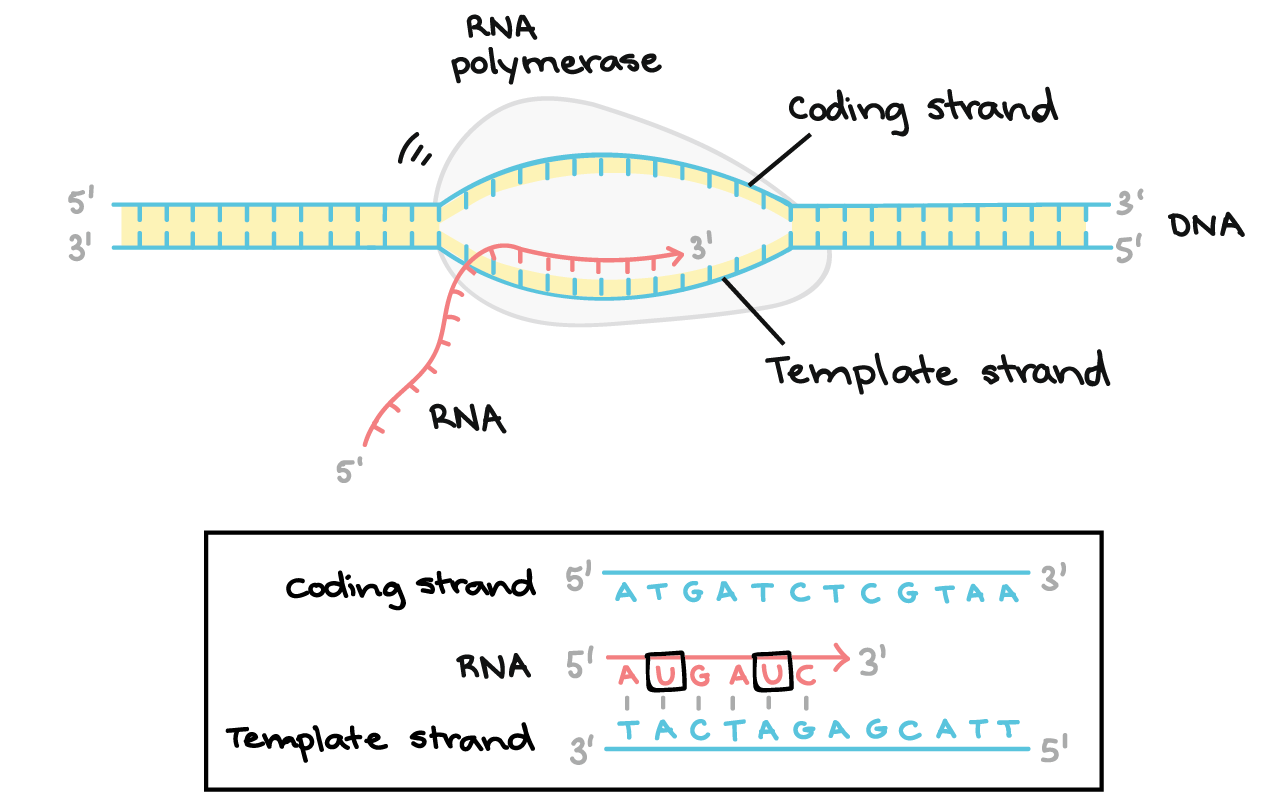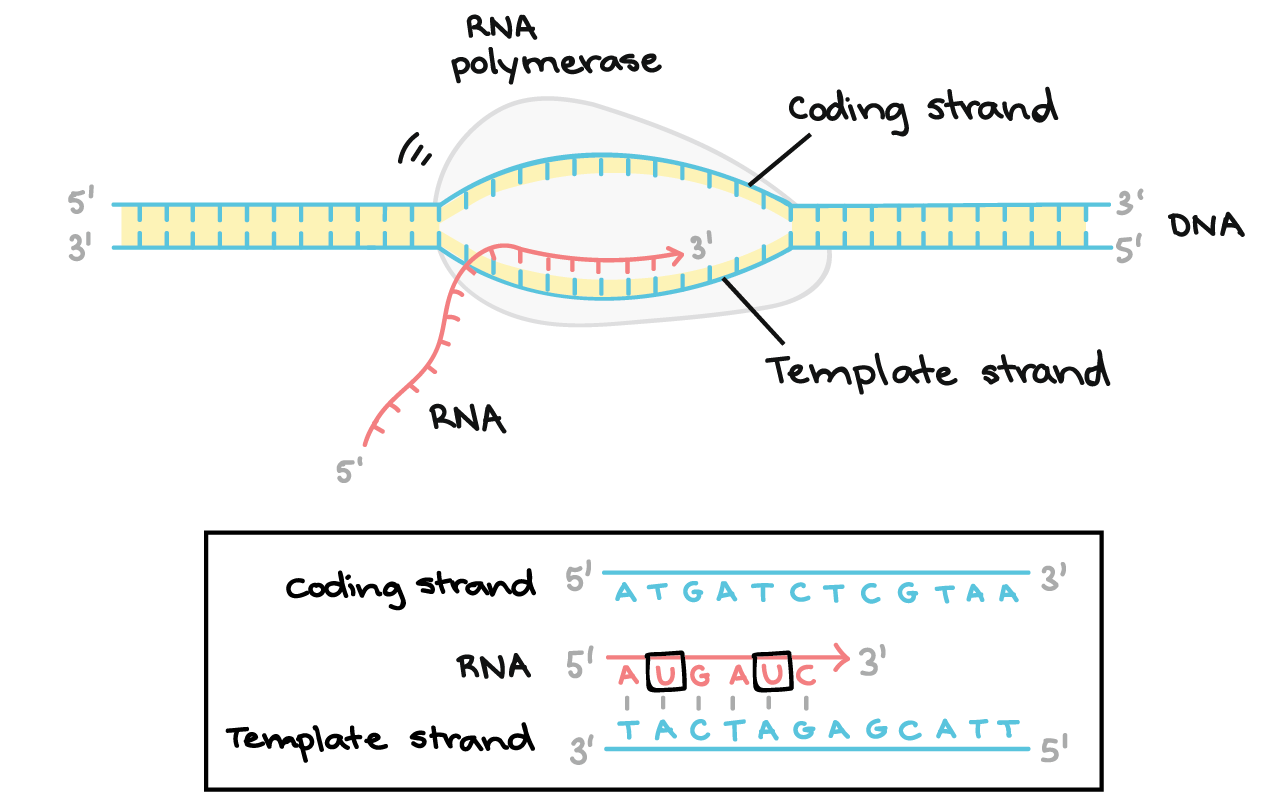

**Transcription**
The actual biological transcription process works from the template strand, doing a reverse complement (TCAG → CUGA) to give the mRNA. However, in Biopython and bioinformatics in general, we typically work directly with the coding strand because this means we can get the mRNA sequence just by switching T → U. In the following block we will perform transcription of the COVID 19 genome into mRNA

In [10]:
covid19_mRNA=covid19_DNA.transcribe()
print("DNA: " +covid19_DNA[:100])
print("RNA: " +covid19_mRNA[:100])

DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC
RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC


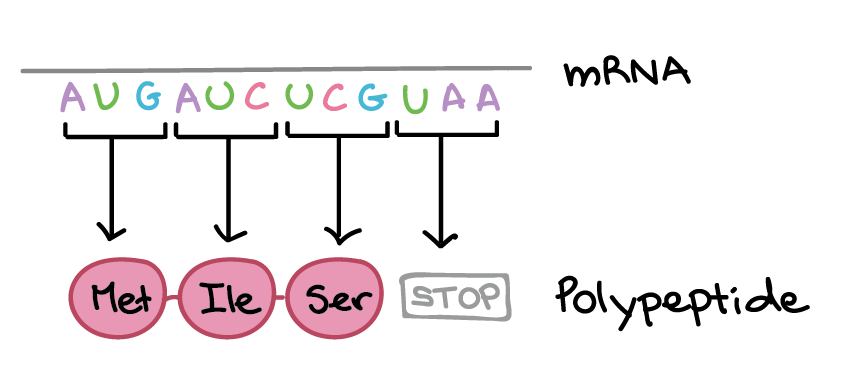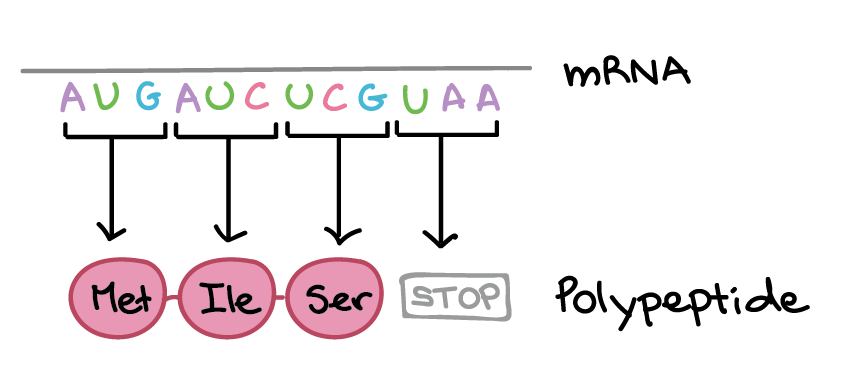
**Translation**

Translation is the process of converting the genetic information encoded in mRNA into a sequence of amino acids, which form the building blocks of proteins. This process is analogous to translating one language into another using a dictionary. In the case of translation, the "dictionary" is the genetic code, which specifies the relationship between nucleotide triplets (codons) and the corresponding amino acids.

During translation, the mRNA sequence is read in groups of three nucleotides (codons), starting from a specific start codon (AUG). Each codon is matched to its corresponding amino acid based on the genetic code. For example, the codon AUG codes for the amino acid methionine and also serves as the start codon to initiate protein synthesis.

As the mRNA is read and codons are translated, a chain of amino acids (polypeptide) is formed. This process continues until a stop codon (UAA, UAG, or UGA) is encountered, indicating the end of protein synthesis. The stop codons do not correspond to any amino acids but instead signal the termination of the polypeptide chain.

In Python, the translate() function provided by Biopython allows us to easily perform this translation process. It takes an mRNA sequence as input and returns the corresponding amino acid sequence. The resulting amino acid chain is represented as a string, with individual amino acids separated by a "*" symbol denoting the stop codon.

Overall, translation is a crucial step in gene expression, as it converts the genetic information stored in the mRNA into functional proteins, which play essential roles in various biological processes. Here we will be translating the covid 19 mRNA to protein

In [11]:
covid19_pro=covid19_DNA.translate()
print("DNA: " +covid19_DNA[:100])
print("RNA: " +covid19_pro[:100])

DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC
RNA: IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQREN


/opt/conda/lib/python3.10/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


by finding the length of the protein, we can find the count of amino acids

In [12]:
print(f"Covid-19's genome has {len(covid19_pro)} amino acids")

Covid-19's genome has 9967 amino acids


Now to segregate these amino acid chains into functional proteins

In [13]:
func_proteins = covid19_pro.split('*')#since * is the end codon
print(f"We have {len(func_proteins)} functional proteins in the covid 19 genome")

We have 775 functional proteins in the covid 19 genome


It is important to note that not all sequences of amino acids correspond to functional proteins. Only those sequences that contain more than 20 amino acids are typically considered as coding for functional proteins. Shorter sequences, known as oligopeptides, may have different functional roles in biological processes.

In our analysis, we will specifically focus on the amino acid chains that consist of more than 20 amino acids, as these are the sequences that are more likely to encode functional proteins. By excluding the shorter chains, we can concentrate on studying the proteins that play essential roles in various biological functions.

In [14]:
for i in func_proteins[:]:
    if len(i) < 20:
        func_proteins.remove(i)

after trimming:

In [15]:
print(f"We have {len(func_proteins)} functional proteins in the covid 19 genome")

We have 80 functional proteins in the covid 19 genome


storing it as a dataframe

In [16]:
func_proteins

[Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('TALCVHQTFGCSNCTSWSCYG'),
 Seq('DTWCPCPSCGRNTSGLPQGSSS'),
 Seq('HLQWGMSKFCISLKFHNQDYSTKG'),
 Seq('RDRHYFGIFFCFHKCFCGNCERFGL'),
 Seq('TEINTESSLCICIRGCSCCTINFLPHS'),
 Seq('NCSKFCACFTEGRYNNTRWNFTVFTETH'),
 Seq('QSSCNGLHYRWCCSVDFAVAN'),
 Seq('IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW'),
 Seq('YDGNKQYLHTQRRCTNKGYFW'),
 Seq('PYTFFKSLCRYCSHKCLLSCL'),
 Seq('NASESFEKSANRQLYNHLPGSGFKWLHCRGGKDSA'),
 Seq('EARNSWNCFLEFARNACTCRRNTQINACLCGN'),
 Seq('NSCYNATWLCNTWLKFGRSCSVYEISQSASYSFCFFT'),
 Seq('PPHASCGHVNDIWTTVWSNLFGWS'),
 Seq('RNNELLVSTCQFRFLQKSLERGV'),
 Seq('TSYKISSTTGVTFCYDVSTTCSV'),
 Seq('RNFVLHRRCFTYKVLRIQRSYYGCFLQRKQLHNNHKTSYL'),
 Seq('FKNYRRGWPHRSNGCLCRQF'),
 Seq('TDKYYNLVFTIKCLPRFFNLLNRCFRCFNV'),
 Seq('WFRFFRHLSFFRNYTNYHFIF'),
 Seq('MGFNCFWLSCRVVFGIYSFH'),
 Seq('VFLCTWIGCNHAIVFQLFCSTFY'),
 Seq('NVHLLCIILLCMEKLCACCRRL'),
 Seq('RIICKISVCLLQSAYVSTYTVTRSGISV'),
 Seq('TCKECVLRQCLIYFYFSSSARVC'),

converting func_proteins into a dataframe in descending order with length

In [17]:
proteinas=pd.DataFrame(func_proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro_= pro.sort_values(by=['Protein length'], ascending=False)

In [18]:
pro_['amino acid sequence'] = pro.iloc[:, 1:2701].apply(lambda x: ''.join(filter(lambda y: y is not None, x)), axis=1)
pro_= pro_.drop(pro.columns[0:2700], axis=1)
pro_['Protein length'] = pro_['amino acid sequence'].str.len()
pro_ = pro_.sort_values('Protein length', ascending=False)

final dataset with proteins in descending order of length

In [19]:
pro_

,amino acid sequence,Protein length
48,IVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...,2700
61,AQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATA...,289
68,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,122
62,ADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLC...,82
67,MFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTE...,62
...,...,...
19,NYRRGWPHRSNGCLCRQFF,19
44,NIYLCISIVGNPTGCRCRW,19
39,RCSYNCHVFGQRYCFYVCL,19
52,QICICLCLEQEENQQLCCR,19


This dataset can be used for future machine learning predictions like classification and function prediction of proteins

We next perform unsupervised machine learning for protein classification using K-means clustering. We start by preparing the data and vectorizing the amino acid sequences. Then, K-means clustering is applied to group the sequences into clusters. The cluster labels are added to the dataset, and the count of sequences in each cluster is displayed. The goal is to classify proteins based on their similarities, without predefined protein classes.Performing Unsupervised K Means clustering on the final dataset we get:

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Prepare the data
X = pro_['amino acid sequence']

# Vectorize the sequences using CountVectorizer
vectorizer = CountVectorizer(analyzer='char')
X_encoded = vectorizer.fit_transform(X)

# Perform K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_encoded)
cluster_labels = kmeans.labels_
pro_['Cluster'] = cluster_labels
print(pro_['Cluster'].value_counts())


4    46
0    30
3     2
1     1
2     1
Name: Cluster, dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
